### Author: <font color='red'> {Paul Garland} </font>

In [1]:
# CSC-221 Final Project
# Build a Web Scraper

In [2]:
# Imports
import urllib.request # used to open URL's
url = "https://en.wikipedia.org/wiki/List_of_Linux_distributions"  
page = urllib.request.urlopen(url)

from bs4 import BeautifulSoup # usedto read HTML information
soup = BeautifulSoup(page, "lxml")

import pandas as pd # used to build data frames to check/ chart data

### Print HTML Page

In [3]:
soup.title
soup.title.string
#print(soup.prettify())

# Use to take all anchors out of the text to allow for better reading of table data
anchors = soup.findAll('a')
for anchor in anchors:
    anchor.replaceWithChildren()
    

### Gather the OS Bases for the many Linux Distros

In [4]:
all_dist_base = soup.find_all('span', class_='mw-headline')
all_dist_base

[<span class="mw-headline" id="RPM-based">RPM-based</span>,
 <span class="mw-headline" id="CentOS/RHEL-based">CentOS/RHEL-based</span>,
 <span class="mw-headline" id="Fedora-based">Fedora-based</span>,
 <span class="mw-headline" id="openSUSE-based">openSUSE-based</span>,
 <span class="mw-headline" id="urpmi-based">urpmi-based</span>,
 <span class="mw-headline" id="apt-rpm_based">apt-rpm based</span>,
 <span class="mw-headline" id="Independent_RPM_distributions">Independent RPM distributions</span>,
 <span class="mw-headline" id="DEB-based">DEB-based</span>,
 <span class="mw-headline" id="Debian-based">Debian-based</span>,
 <span class="mw-headline" id="Debian-based_(security-oriented)">Debian-based (security-oriented)</span>,
 <span class="mw-headline" id="MEPIS-based">MEPIS-based</span>,
 <span class="mw-headline" id="Knoppix-based">Knoppix-based</span>,
 <span class="mw-headline" id="Ubuntu-based">Ubuntu-based</span>,
 <span class="mw-headline" id="Official_distributions">Official di

### Compile a list of all the tables

In [5]:
all_base_tables = soup.find_all('table', class_='wikitable')
all_base_tables

[<table class="wikitable">
 <tbody><tr>
 <th>Distribution</th>
 <th>Description
 </th></tr>
 <tr>
 <td>Red Hat Linux
 </td>
 <td>Split into Fedora Core and Red Hat Enterprise Linux. The last official release of the unsplit distribution was Red Hat Linux 9 in March 2003.
 </td></tr>
 <tr>
 <td>CentOS
 </td>
 <td>Community-supported Linux distribution designed as an OpenSource version of RHEL and well suited for servers. Now sponsored by Red Hat.<sup class="reference" id="cite_ref-2">[2]</sup>
 </td></tr>
 <tr>
 <td>Fedora
 </td>
 <td>Community-supported Linux distribution sponsored by Red Hat.
 </td></tr>
 <tr>
 <td>openSUSE
 </td>
 <td>A community-developed Linux distribution, sponsored by SUSE. It maintains a strict policy of ensuring all code in the standard installs will be from FOSS solutions, including Linux kernel Modules. SUSE's enterprise Linux products are all based on the codebase that comes out of the openSUSE project.
 </td></tr>
 <tr>
 <td>Mandrake Linux
 </td>
 <td>The fi

In [6]:
# list size of the bases is larger than that of the tables
base_num = len(all_dist_base)
table_num = len(all_base_tables)
print(f'Number of base Distributions: {base_num}') # debug
print(f'Number of Tables: {table_num}') # debug
print()
# all_dist_base 

Number of base Distributions: 33
Number of Tables: 28



In [7]:
# convert the table into readable elements and clear up unneeded data
base_list=[]
iter = 0

for elem in all_dist_base:
    base_list.append(elem.find(text=True))
    
base_list
        
base_list.remove('References')
base_list.remove('DEB-based')
base_list.remove('Official distributions')    
base_list.remove('See also')
base_list.remove('External links')

print(base_list)

['RPM-based', 'CentOS/RHEL-based', 'Fedora-based', 'openSUSE-based', 'urpmi', 'apt-rpm', 'Independent RPM distributions', 'Debian-based', 'Debian-based (security-oriented)', 'MEPIS-based', 'Knoppix-based', 'Ubuntu-based', 'Discontinued official distributions', 'Third-party distributions', 'Pacman-based', 'Portage-based', 'Slackware-based', 'Slax-based', 'Source based', 'Rollback', 'Mobile device', 'Router', 'Embedded systems', 'Minimalist', 'Historical', 'Security-oriented', 'Entertainment', 'Not categorized']


In [8]:
# check for matching list length
base_num = len(base_list)
table_num = len(all_base_tables)
print(f'Number of base Distributions: {base_num}') # debug
print(f'Number of Tables: {table_num}') # debug

Number of base Distributions: 28
Number of Tables: 28


### Create data frame for the data

In [9]:
base=[]
dist=[]
descr=[]
count = 0
while count < base_num:
    print(base_num)
    print(count)
    current_base = base_list[count]
    current_table = all_base_tables[count]
    
    for row in current_table.findAll('tr'):
        cells=row.findAll('td')
        if len(cells)==2:
            base.append(current_base)
            dist.append(cells[0].find(text=True))
            descr.append(cells[1].find(text=True))
   
    
    count=count+1


28
0
28
1
28
2
28
3
28
4
28
5
28
6
28
7
28
8
28
9
28
10
28
11
28
12
28
13
28
14
28
15
28
16
28
17
28
18
28
19
28
20
28
21
28
22
28
23
28
24
28
25
28
26
28
27


In [10]:
descr

['Split into ',
 'Community-supported Linux distribution designed as an OpenSource version of RHEL and well suited for servers. Now sponsored by ',
 'Community-supported Linux distribution sponsored by ',
 'A community-developed Linux distribution, sponsored by ',
 'The first release was based on Red Hat Linux (version 5.1) and ',
 'A 100% community owned and governed alternative ',
 'A Linux distribution co-developed between ',
 'A Linux distribution designed for use in small and medium enterprises.\n',
 'Based on Scientific Linux.',
 'Developed by Japanese software vendor Miracle Linux Co., Ltd\n',
 'Supported by ',
 'A Linux distribution developed in China and optimized for the Chinese market. Based on Asianux.\n',
 'A Linux distribution for building a High-Performance Computing computer cluster, with a recent release supporting Cloud computing. It is based on ',
 'A Linux distribution that is currently in development by the CentOS founder, Gregory Kurtzer, aims to be compatible wit

In [11]:


df=pd.DataFrame(dist,columns=['Distribution'])
df['Base']=base
df['Description']=descr
df[5:10]

,Distribution,Base,Description
5,AlmaLinux,CentOS/RHEL-based,A 100% community owned and governed alternative
6,Asianux,CentOS/RHEL-based,A Linux distribution co-developed between
7,ClearOS,CentOS/RHEL-based,A Linux distribution designed for use in small...
8,Fermi Linux LTS,CentOS/RHEL-based,Based on Scientific Linux.
9,Miracle Linux,CentOS/RHEL-based,Developed by Japanese software vendor Miracle ...


### Make CSV

In [12]:
df.to_csv("distro_archive.csv")

### Cristian's Code

In [13]:
import matplotlib.pyplot as plt
import numpy as np

In [14]:
baseArray = np.array(base)
allBases = np.unique(baseArray)
print(allBases)

['CentOS/RHEL-based' 'Debian-based' 'Debian-based (security-oriented)'
 'Discontinued official distributions' 'Embedded systems' 'Entertainment'
 'Fedora-based' 'Historical' 'Independent RPM distributions'
 'Knoppix-based' 'MEPIS-based' 'Minimalist' 'Mobile device'
 'Not categorized' 'Pacman-based' 'Portage-based' 'RPM-based' 'Rollback'
 'Router' 'Security-oriented' 'Slackware-based' 'Slax-based'
 'Source based' 'Third-party distributions' 'Ubuntu-based' 'apt-rpm'
 'openSUSE-based' 'urpmi']


In [15]:
amtofeachBase = []
for bases in allBases:
    print(bases + ": " + str(base.count(bases)))
    amtofeachBase.append({"Base":bases, "Amount": base.count(bases)})

CentOS/RHEL-based: 11
Debian-based: 43
Debian-based (security-oriented): 7
Discontinued official distributions: 10
Embedded systems: 3
Entertainment: 2
Fedora-based: 17
Historical: 6
Independent RPM distributions: 3
Knoppix-based: 3
MEPIS-based: 2
Minimalist: 5
Mobile device: 12
Not categorized: 9
Pacman-based: 15
Portage-based: 10
RPM-based: 5
Rollback: 3
Router: 5
Security-oriented: 2
Slackware-based: 17
Slax-based: 2
Source based: 6
Third-party distributions: 41
Ubuntu-based: 8
apt-rpm: 3
openSUSE-based: 4
urpmi: 5


In [16]:
baseDF = pd.DataFrame(amtofeachBase)
print(baseDF)

                                   Base  Amount
0                     CentOS/RHEL-based      11
1                          Debian-based      43
2      Debian-based (security-oriented)       7
3   Discontinued official distributions      10
4                      Embedded systems       3
5                         Entertainment       2
6                          Fedora-based      17
7                            Historical       6
8         Independent RPM distributions       3
9                         Knoppix-based       3
10                          MEPIS-based       2
11                           Minimalist       5
12                        Mobile device      12
13                      Not categorized       9
14                         Pacman-based      15
15                        Portage-based      10
16                            RPM-based       5
17                             Rollback       3
18                               Router       5
19                    Security-oriented 

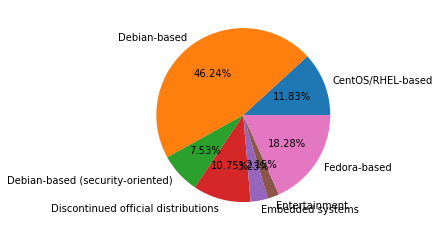

In [17]:
plt.pie(data = baseDF.head(7), x = "Amount", labels = "Base", autopct = '%1.2f%%')
plt.show()

In [18]:
sortedbaseDF = baseDF.sort_values("Amount", ascending = False).head(8)
totalUnsorted = baseDF["Amount"].sum()
totalSorted = sortedbaseDF["Amount"].sum()
otherTotal = totalUnsorted - totalSorted

                                  Base  Amount
0                         Debian-based      43
1            Third-party distributions      41
2                         Fedora-based      17
3                      Slackware-based      17
4                         Pacman-based      15
5                        Mobile device      12
6                    CentOS/RHEL-based      11
7  Discontinued official distributions      10
8                                Other      93


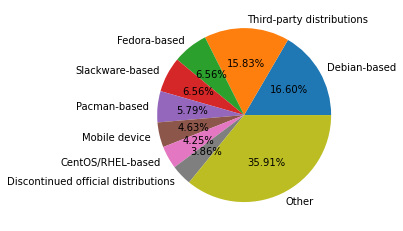

In [19]:
d2 = {"Base":"Other", "Amount":otherTotal}
d2DF = pd.DataFrame(d2, index = [9])
sortedbaseDF = pd.concat([sortedbaseDF, d2DF])
print(sortedbaseDF.reset_index(drop=True))
plt.pie(data = sortedbaseDF, x = "Amount", labels = "Base", autopct = '%1.2f%%')
plt.show()